<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(2_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,47.760918,73.570223,94.068737,29.060735,49.370815,303.831427,283.948657,19.882770
1,0.0,1.0,60.402001,99.809242,89.190754,31.389562,-19.641733,271.149827,311.852334,-40.702507
2,0.0,2.0,62.862320,82.110118,40.376211,44.916597,83.866071,324.131318,228.959442,95.171876
3,0.0,3.0,61.014178,65.554873,62.451956,70.414029,-44.441655,224.993380,239.059562,-14.066182
4,0.0,4.0,22.229736,42.726531,93.154366,25.803038,-109.164550,84.749120,246.859249,-162.110129
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.046027,67.053435,83.814719,38.160669,-88.530010,192.544840,360.477872,-167.933032
29996,999.0,26.0,39.677764,76.021407,66.987429,71.892242,-215.293159,49.285682,396.043669,-346.757987
29997,999.0,27.0,84.569577,30.103468,99.713123,61.373241,29.098509,314.857918,276.835429,38.022489
29998,999.0,28.0,44.571389,82.134889,85.887074,22.682283,-65.298799,179.976836,367.211976,-187.235140


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    47.760918  73.570223  94.068737  29.060735   49.370815   
      1.0    60.402001  99.809242  89.190754  31.389562  -19.641733   
      2.0    62.862320  82.110118  40.376211  44.916597   83.866071   
      3.0    61.014178  65.554873  62.451956  70.414029  -44.441655   
      4.0    22.229736  42.726531  93.154366  25.803038 -109.164550   
...                ...        ...        ...        ...         ...   
999.0 25.0   82.046027  67.053435  83.814719  38.160669  -88.530010   
      26.0   39.677764  76.021407  66.987429  71.892242 -215.293159   
      27.0   84.569577  30.103468  99.713123  61.373241   29.098509   
      28.0   44.571389  82.134889  85.887074  22.682283  -65.298799   
      29.0   72.372125  29.264091  98.487013  78.768731   47.372771   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    303.831427  283.948657   19.882770  
      1.0    271.149827  311.852334  -40.702507  
      2.0    324.131318  228.959442   95.171876  
      3.0    224.993380  239.059562  -14.066182  
      4.0     84.749120  246.859249 -162.110129  
...                 ...         ...         ...  
999.0 25.0   192.544840  360.477872 -167.933032  
      26.0    49.285682  396.043669 -346.757987  
      27.0   314.857918  276.835429   38.022489  
      28.0   179.976836  367.211976 -187.235140  
      29.0   336.264731  288.847485   47.417246  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    47.760918  73.570223  94.068737  29.060735   49.370815   
      1.0    60.402001  99.809242  89.190754  31.389562  -19.641733   
      2.0    62.862320  82.110118  40.376211  44.916597   83.866071   
      3.0    61.014178  65.554873  62.451956  70.414029  -44.441655   
      4.0    22.229736  42.726531  93.154366  25.803038 -109.164550   
...                ...        ...        ...        ...         ...   
999.0 25.0   82.046027  67.053435  83.814719  38.160669  -88.530010   
      26.0   39.677764  76.021407  66.987429  71.892242 -215.293159   
      27.0   84.569577  30.103468  99.713123  61.373241   29.098509   
      28.0   44.571389  82.134889  85.887074  22.682283  -65.298799   
      29.0   72.372125  29.264091  98.487013  78.768731   47.372771   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    303.831427  283.948657   19.882770  
      1.0    271.149827  311.852334  -40.702507  
      2.0    324.131318  228.959442   95.171876  
      3.0    224.993380  239.059562  -14.066182  
      4.0     84.749120  246.859249 -162.110129  
...                 ...         ...         ...  
999.0 25.0   192.544840  360.477872 -167.933032  
      26.0    49.285682  396.043669 -346.757987  
      27.0   314.857918  276.835429   38.022489  
      28.0   179.976836  367.211976 -187.235140  
      29.0   336.264731  288.847485   47.417246  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,47.760918,73.570223,94.068737,29.060735,49.370815,303.831427,283.948657,19.882770
1,0.0,1.0,60.402001,99.809242,89.190754,31.389562,-19.641733,271.149827,311.852334,-40.702507
2,0.0,2.0,62.862320,82.110118,40.376211,44.916597,83.866071,324.131318,228.959442,95.171876
3,0.0,3.0,61.014178,65.554873,62.451956,70.414029,-44.441655,224.993380,239.059562,-14.066182
4,0.0,4.0,22.229736,42.726531,93.154366,25.803038,-109.164550,84.749120,246.859249,-162.110129
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.046027,67.053435,83.814719,38.160669,-88.530010,192.544840,360.477872,-167.933032
29996,999.0,26.0,39.677764,76.021407,66.987429,71.892242,-215.293159,49.285682,396.043669,-346.757987
29997,999.0,27.0,84.569577,30.103468,99.713123,61.373241,29.098509,314.857918,276.835429,38.022489
29998,999.0,28.0,44.571389,82.134889,85.887074,22.682283,-65.298799,179.976836,367.211976,-187.235140


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    47.760918  73.570223  94.068737  29.060735   49.370815   
      1.0    60.402001  99.809242  89.190754  31.389562  -19.641733   
      2.0    62.862320  82.110118  40.376211  44.916597   83.866071   
      3.0    61.014178  65.554873  62.451956  70.414029  -44.441655   
      4.0    22.229736  42.726531  93.154366  25.803038 -109.164550   
...                ...        ...        ...        ...         ...   
999.0 25.0   82.046027  67.053435  83.814719  38.160669  -88.530010   
      26.0   39.677764  76.021407  66.987429  71.892242 -215.293159   
      27.0   84.569577  30.103468  99.713123  61.373241   29.098509   
      28.0   44.571389  82.134889  85.887074  22.682283  -65.298799   
      29.0   72.372125  29.264091  98.487013  78.768731   47.372771   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    303.831427  283.948657   19.882770  
      1.0    271.149827  311.852334  -40.702507  
      2.0    324.131318  228.959442   95.171876  
      3.0    224.993380  239.059562  -14.066182  
      4.0     84.749120  246.859249 -162.110129  
...                 ...         ...         ...  
999.0 25.0   192.544840  360.477872 -167.933032  
      26.0    49.285682  396.043669 -346.757987  
      27.0   314.857918  276.835429   38.022489  
      28.0   179.976836  367.211976 -187.235140  
      29.0   336.264731  288.847485   47.417246  

[30000 rows x 8 columns]

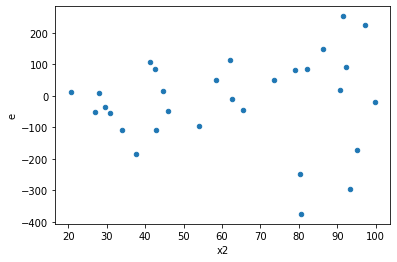

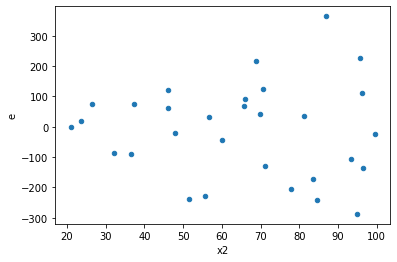

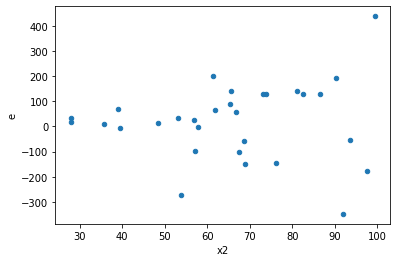

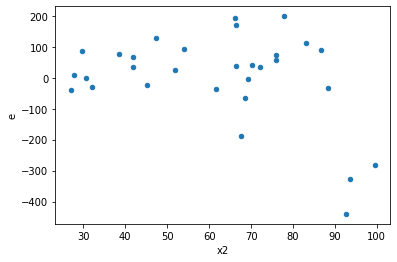

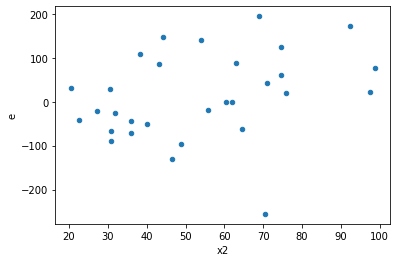

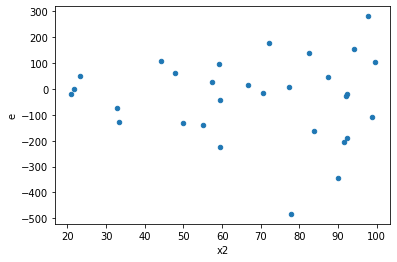

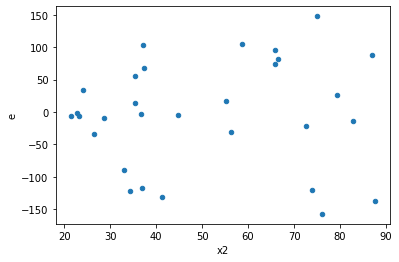

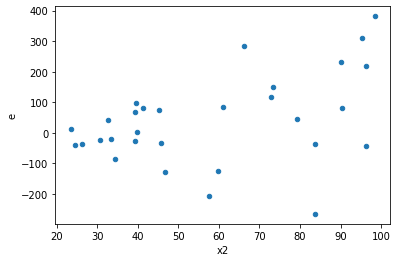

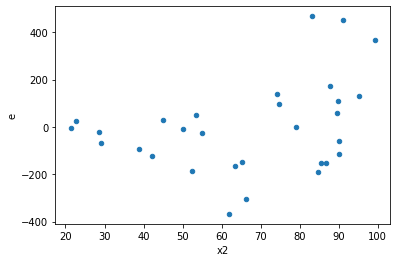

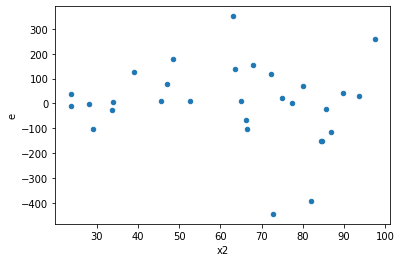

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,12.0,10.0,227514.0382971172,252339.9763472457,18959.503191426433,25233.997634724572,1.3309419228946617,0.6597845155986604,0.6701077422006698,0.3298922577993302,Reject005=1 : Homoscedasticity
1.0,9.0,13.0,107085.60599895722,427056.2427391208,11898.400666550802,32850.4802107016,2.7609156164199455,0.09453521446878344,0.9527323927656083,0.04726760723439172,Reject005=1 : Homoscedasticity
2.0,3.0,19.0,36092.96086761108,573018.3297716415,12030.98695587036,30158.859461665343,2.5067652032445875,0.1797585128083825,0.9101207435958087,0.08987925640419125,Reject005=1 : Homoscedasticity
7.0,11.0,11.0,70552.68200784561,299463.81704966625,6413.8801825314185,27223.983368151476,4.24454192990658,0.024188985943270014,0.987905507028365,0.012094492971635007,Reject005=0 : Heteroscedasticity
9.0,8.0,14.0,41203.49593322215,521152.0812492209,5150.4369916527685,37225.14866065863,7.227570926697839,0.0014675681806981533,0.9992662159096509,0.0007337840903490767,Reject005=0 : Heteroscedasticity
11.0,10.0,12.0,107006.4442024766,357053.77790148015,10700.64442024766,29754.48149179001,2.7806251963189115,0.09686205698484707,0.9515689715075765,0.048431028492423533,Reject005=1 : Homoscedasticity
14.0,12.0,10.0,96421.49392207738,105758.02731137042,8035.124493506449,10575.802731137042,1.3161964994672866,0.6726893976715971,0.6636553011642015,0.33634469883579854,Reject005=1 : Homoscedasticity
15.0,12.0,10.0,290179.9443775342,540787.8306790377,24181.662031461183,54078.78306790377,2.2363550941016954,0.211475964093907,0.8942620179530465,0.1057379820469535,Reject005=1 : Homoscedasticity
16.0,9.0,13.0,106789.16106336116,181272.649603117,11865.462340373462,13944.049969470538,1.175179657519494,0.7672511435040339,0.616374428247983,0.38362557175201695,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,10.0,227514.0382971172,252339.9763472457,18959.503191426433,25233.997634724572,1.3309419228946617,0.6597845155986604,Reject005=1 : Homoscedasticity
1.0,9.0,13.0,107085.60599895722,427056.2427391208,11898.400666550802,32850.4802107016,2.7609156164199455,0.09453521446878344,Reject005=1 : Homoscedasticity
2.0,3.0,19.0,36092.96086761108,573018.3297716415,12030.98695587036,30158.859461665343,2.5067652032445875,0.1797585128083825,Reject005=1 : Homoscedasticity
3.0,14.0,8.0,316308.96399403206,149691.47787776127,22593.497428145147,18711.43473472016,0.8281778770298294,0.7234780699272526,Reject005=1 : Homoscedasticity
4.0,7.0,15.0,114735.21501618589,66853.42456665683,16390.74500231227,4456.894971110455,0.2719153382278666,0.08882860160264365,Reject005=1 : Homoscedasticity
5.0,14.0,8.0,413218.4686122608,194013.58184526325,29515.604900875773,24251.697730657907,0.82165680873233,0.7141237315976238,Reject005=1 : Homoscedasticity
6.0,9.0,13.0,97394.4384810411,73081.60234680293,10821.604275671234,5621.661718984841,0.5194850574626233,0.3280918025641695,Reject005=1 : Homoscedasticity
7.0,11.0,11.0,70552.68200784561,299463.81704966625,6413.8801825314185,27223.983368151476,4.24454192990658,0.024188985943270014,Reject005=0 : Heteroscedasticity
8.0,9.0,13.0,437373.1600659705,308662.159233163,48597.01778510783,23743.243017935616,0.48857407511971945,0.2848509830870367,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      694
Reject005=0 : Heteroscedasticity    306
Name: Result_test, dtype: int64